<a href="https://colab.research.google.com/github/anslava00/Torch_sber/blob/main/Neiron_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')
root_goog_drive = '/content/drive/MyDrive/Colab_Notebooks/sber_neiron/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(root_goog_drive + 'data.csv', index_col=0)

In [4]:
df.head()

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

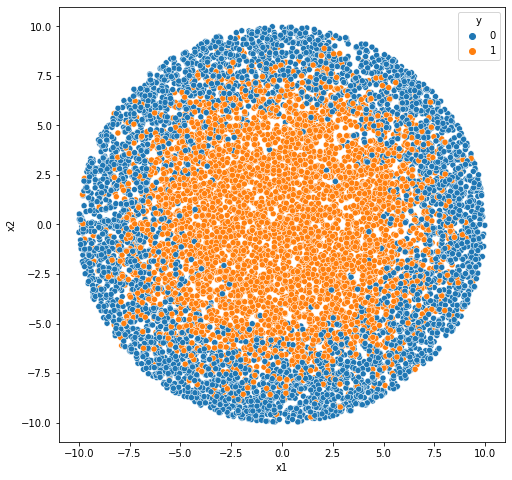

In [5]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1),
                                                    df['y'], test_size = 0.33)

Точность нашей модели 0.6021212121212122


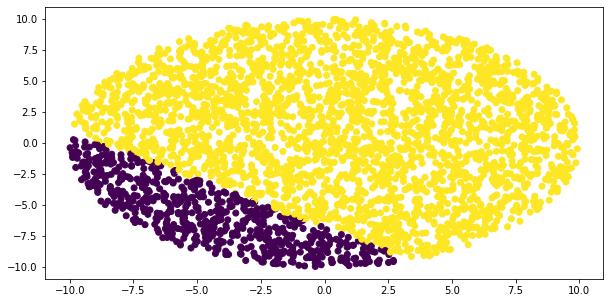

In [8]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

predict_logit = logreg_model.predict(X_test)
predict_log_proba = logreg_model.predict_proba(X_test)


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

plt.figure(figsize=(10, 5))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_logit)
plt.show()

Точность нашей модели 0.8342424242424242


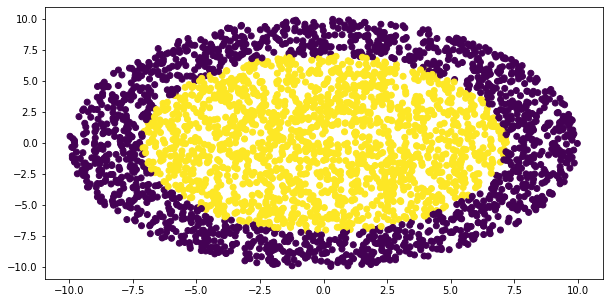

In [9]:
df_new = df.copy()

df_new['new_feature_1'] = df_new['x1']**2
df_new['new_feature_2'] = df_new['x2']**2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new.drop('y', axis=1),
                                                                    df_new['y'], test_size = 0.33)

logreg_model = LogisticRegression()
logreg_model.fit(X_train_new, y_train_new)

predict_logit = logreg_model.predict(X_test_new)
predict_log_proba = logreg_model.predict_proba(X_test_new)


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test_new)}')

plt.figure(figsize=(10, 5))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_logit)
plt.show()

Точность нашей модели 0.8187878787878788


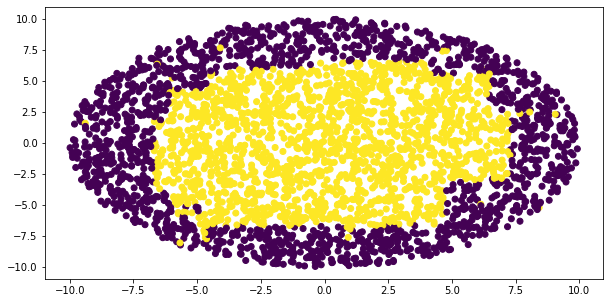

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=8)
tree_model.fit(X_train, y_train)

predict_tree = tree_model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

# predict_tree_proba = # ...

plt.figure(figsize=(10, 5))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

Точность нашей модели 0.8354545454545454


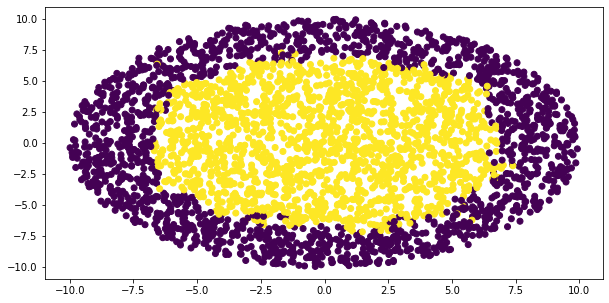

In [12]:

random_tree_model = RandomForestClassifier(n_estimators=500, n_jobs=3, max_depth=10)
random_tree_model.fit(X_train, y_train)

predict_forest = random_tree_model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

plt.figure(figsize=(10, 5))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest)
plt.show()

In [13]:
!pip install torchmetrics -q

In [73]:
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import torch

from torchmetrics import Accuracy
from sklearn.metrics import accuracy_score

In [128]:
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 2
LEARNING_RATE = 1e-3
EPOCHS = 200
BATCH_SIZE = 256

In [129]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader

In [130]:
train_loader, test_loader = create_data_loader(X_train.values, 
                                               y_train.values, 
                                               X_test.values, 
                                               y_test.values)

In [137]:
def build_simple_model():
    model = nn.Sequential(  
        nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE),
        nn.Tanh(),
        
        nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE),
        nn.Tanh(),

        nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE),
        nn.Tanh(),
        
        nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE),
        nn.Softmax(),
    )

    return model

In [138]:
model = build_simple_model()
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Tanh()
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): Tanh()
  (6): Linear(in_features=5, out_features=2, bias=True)
  (7): Softmax(dim=None)
)


In [139]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()
accuracy = Accuracy(task="multiclass", num_classes=2)

In [140]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0

    for epoch in range(EPOCHS):
        running_loss = []
        running_acc = []
        model.train()
        for features, label in train_loader:
            # Reset gradients
            optimizer.zero_grad()

            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            loss.backward()
            
            acc = accuracy(output, label).item()
            optimizer.step()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : train_loss: %f train_acc: %f' % (epoch, train_loss_values[-1], train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        model.eval()
        for features, label in test_loader:
            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            
            # softmax_output = softmax(output)
            acc = accuracy(output, label).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : valid_loss: %f valid_acc: %f' % (epoch, valid_loss_values[-1], valid_accuracy[-1]))
            print()
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [141]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy_values = run_train()

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


EPOCH 0 : train_loss: 0.697508 train_acc: 0.497409
EPOCH 0 : valid_loss: 0.696155 valid_acc: 0.493168

EPOCH 20 : train_loss: 0.500882 train_acc: 0.836240
EPOCH 20 : valid_loss: 0.502712 valid_acc: 0.825937

EPOCH 40 : train_loss: 0.471790 train_acc: 0.838752
EPOCH 40 : valid_loss: 0.474632 valid_acc: 0.830929

EPOCH 60 : train_loss: 0.467414 train_acc: 0.841014
EPOCH 60 : valid_loss: 0.471142 valid_acc: 0.835173

EPOCH 80 : train_loss: 0.468436 train_acc: 0.838029
EPOCH 80 : valid_loss: 0.470106 valid_acc: 0.835400

EPOCH 100 : train_loss: 0.467145 train_acc: 0.840225
EPOCH 100 : valid_loss: 0.469295 valid_acc: 0.838478

EPOCH 120 : train_loss: 0.467381 train_acc: 0.837963
EPOCH 120 : valid_loss: 0.468778 valid_acc: 0.837577

EPOCH 140 : train_loss: 0.465696 train_acc: 0.841304
EPOCH 140 : valid_loss: 0.469307 valid_acc: 0.837013

EPOCH 160 : train_loss: 0.467066 train_acc: 0.840370
EPOCH 160 : valid_loss: 0.468627 valid_acc: 0.836712

EPOCH 180 : train_loss: 0.466111 train_acc: 0.841

Точность нашей модели 0.8354545454545454


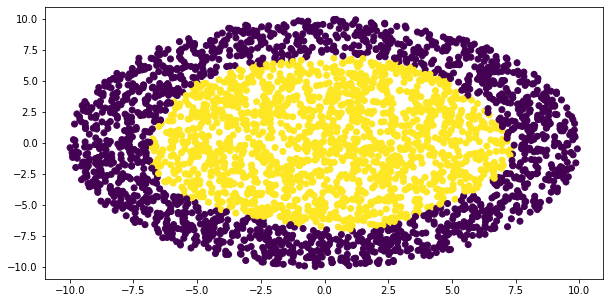

In [142]:
predict_neural = torch.argmax(model(torch.tensor(X_test.values.astype(np.float32))), dim=1)
# predict_classes = model(torch.tensor(X_test.values.astype(np.float32)))

print(f'Точность нашей модели {accuracy_score(predict_neural, y_test)}')

plt.figure(figsize=(10, 5))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()